# **Regression (REgresi)**
Definsi : Regresi adalah metode statistik yang di gunakan untuk memodelkan dan menganalisis hubungan antar variable indenpenden (prediktor) dan variable dependen ( target ).<br>
Tujuan : Untuk memprediksi atau memperkirakan nilai variable dependen berdasarkan nilai nilai variable independen

# **Generate Synthetic Data**

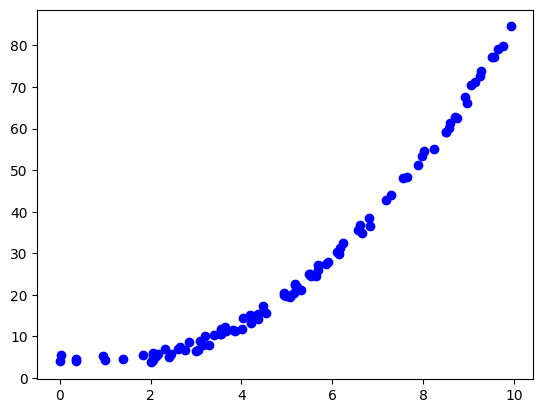

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100, 1) * 10
#y = 3.5 * x + x + np.random.rand(100, 1) * 3
y = 0.5 + x**2 - 2*x + np.random.rand(100, 1) * 3

plt.scatter(x, y, color='blue')
plt.show()

# **TRAIN TEST SPLIT**

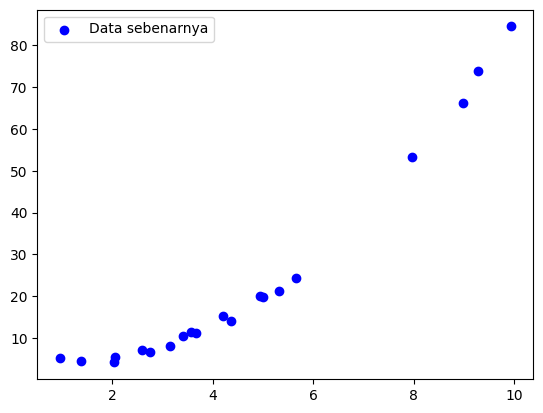

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Plot the test data
plt.scatter(x_test, y_test, color='blue', label='Data sebenarnya')
plt.legend()
plt.show()

# **LINEAR REGRESION**
definisi : merupakan model regresi yang bertujuan untuk mencari hubungan linear antara variable indepeden depeden

$$
  \hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

Hasil MSE = 50.59701930620917


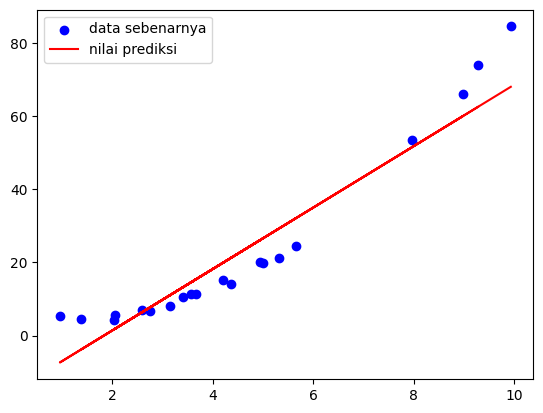

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
#training
linear_model.fit(x_train,y_train)

#testing
y_pred = linear_model.predict(x_test)
mse = mean_squared_error(y_pred, y_test) # hasil prediksi dan data asli
print(f"Hasil MSE = {mse}")

plt.scatter(x_test, y_test, color='blue', label = 'data sebenarnya')
plt.plot(x_test, y_pred, color = 'red', label = 'nilai prediksi')
plt.legend()
plt.show()


# **Ridge REgression**
Definisi : salah satu bagian dari linear regression dengan menambahakan penalti L2 regularization agar dapat membantu mengurangi overfiting

$$
  L(\beta) = \sum{i=1}^{m} (y_i -\hat{y_i})^2 = \lambda \sum_{j=1}^{n} |\beta_j |
$$

$$
  L(\beta) = jumlah kesalahan kuadrat + lambda * penalti (L1 regularization)
$$

Hasil MSE = 50.609976514960046


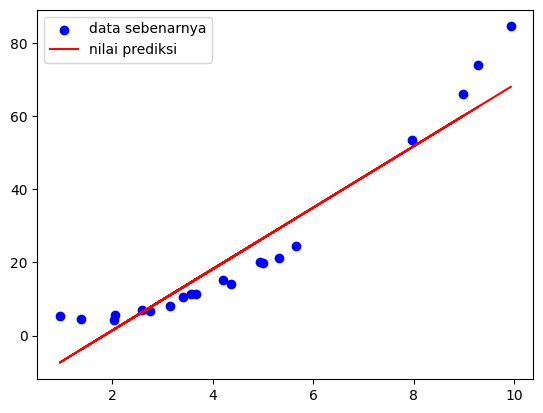

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=0.1) #lambda = alpha untuk mengukur seberapa kecol mendekati 0 MSE semakin bagus
#training
ridge_model.fit(x_train,y_train)

#testing
y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_pred, y_test) # hasil prediksi dan data asli
print(f"Hasil MSE = {mse}")

plt.scatter(x_test, y_test, color='blue', label = 'data sebenarnya')
plt.plot(x_test, y_pred, color = 'red', label = 'nilai prediksi')
plt.legend()
plt.show()


# **Lasso Regression**

$$
  L(\beta) = \sum{i=1}^{m} (y_i -\hat{y_i})^2 = \lambda \sum_{j=1}^{n} |\beta_j |
$$

Hasil MSE = 50.72193133933036


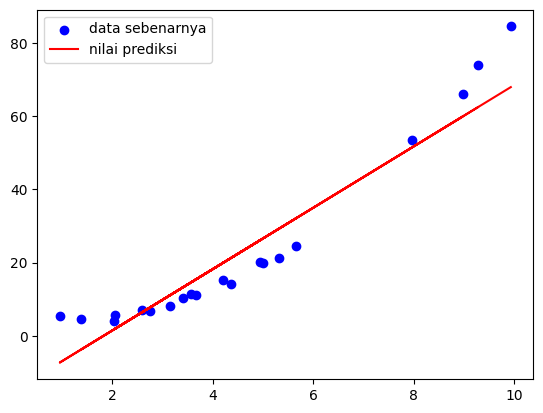

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso_model = Lasso(alpha=0.1) #lambda = alpha untuk mengukur seberapa kecol mendekati 0 MSE semakin bagus
#training
lasso_model.fit(x_train,y_train)

#testing
y_pred = lasso_model.predict(x_test)
mse = mean_squared_error(y_pred, y_test) # hasil prediksi dan data asli
print(f"Hasil MSE = {mse}")

plt.scatter(x_test, y_test, color='blue', label = 'data sebenarnya')
plt.plot(x_test, y_pred, color = 'red', label = 'nilai prediksi')
plt.legend()
plt.show()


# **Polynomial REgression**
definisi : ektensi dari linear regression yang memperkenalkan derajat polinomial kedalam persamaan untuk membuat hbungan non-linear

$$
  \hat{y} = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 \dots + \beta_n X^n
$$

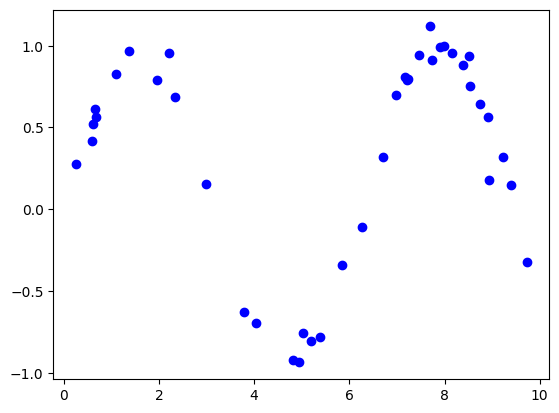

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#generate synthetic data
x = np.sort(np.random.rand(40) * 10).reshape(-1, 1)
y = np.sin(x).ravel() + np.random.randn(40) * 0.1

plt.scatter(x,y, color = 'blue')


Text(0.5, 1.0, 'Overfitting \n MSE = 0.022880259596956196')

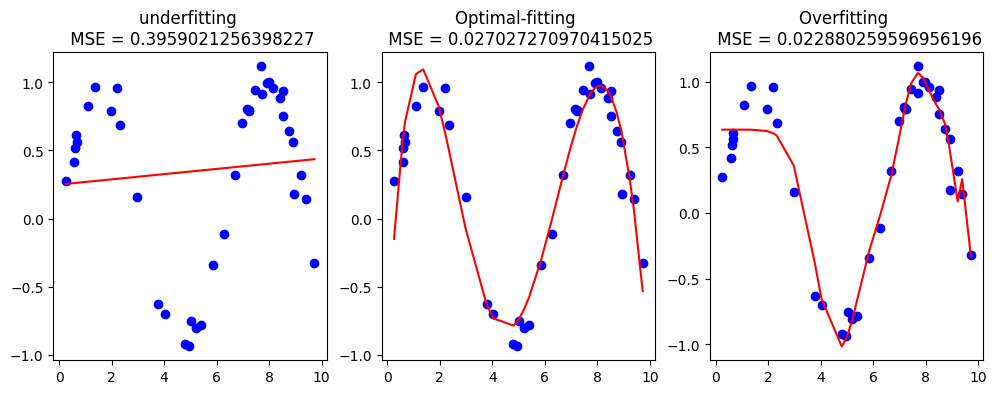

In [ ]:
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(12,4))

#under-fitting (linear Regression)

plt.subplot(1,3,1) #baris 1 kolom 3 uratan 1
linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred = linear_model.predict(x)
mse = mean_squared_error(y,y_pred)
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color = 'red')
plt.title(f'underfitting \n MSE = {mse}')

#Optimal - Fitting / good generalization ( polynimial regression)

plt.subplot(1,3,2) #baris 1 kolom 3, urutan 2
optimal_model = make_pipeline (PolynomialFeatures (degree=5), LinearRegression()) #Polynomial regression
optimal_model.fit(x,y)
y_pred = optimal_model.predict(x)
mse = mean_squared_error(y,y_pred) #MSE training
plt.scatter(x, y, color='blue')
plt.plot(x,y_pred, color = 'red')
plt.title(f'Optimal-fitting \n MSE = {mse}')

#Overfitting ( polynimial regression)

plt.subplot(1,3,3) #baris 1 kolom 3, urutan 3
overfit_model = make_pipeline (PolynomialFeatures (degree=20), LinearRegression()) #Polynomial regression
overfit_model.fit(x,y)
y_pred = overfit_model.predict(x)
mse = mean_squared_error(y,y_pred) #MSE training
plt.scatter(x, y, color='blue')
plt.plot(x,y_pred, color = 'red')
plt.title(f'Overfitting \n MSE = {mse}')